<a href="https://colab.research.google.com/github/plaban1981/AI_Explainability/blob/main/Plaban_Nayak_XAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

**Data Description**

 

* age: Age in years
* sex: 1 = male, 0 = female
* cp: Chest pain type
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results
* thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-4) colored by fluoroscopy
* thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
* target: 1 = Heart disease present, 0 = Heart disease not present

# Task 1

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


## Perform Basic Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


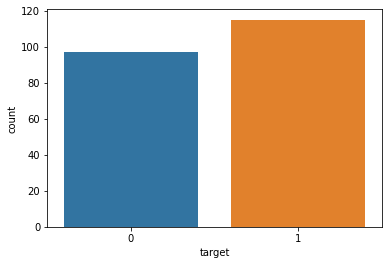

In [ ]:
sns.countplot(heart_data.target)

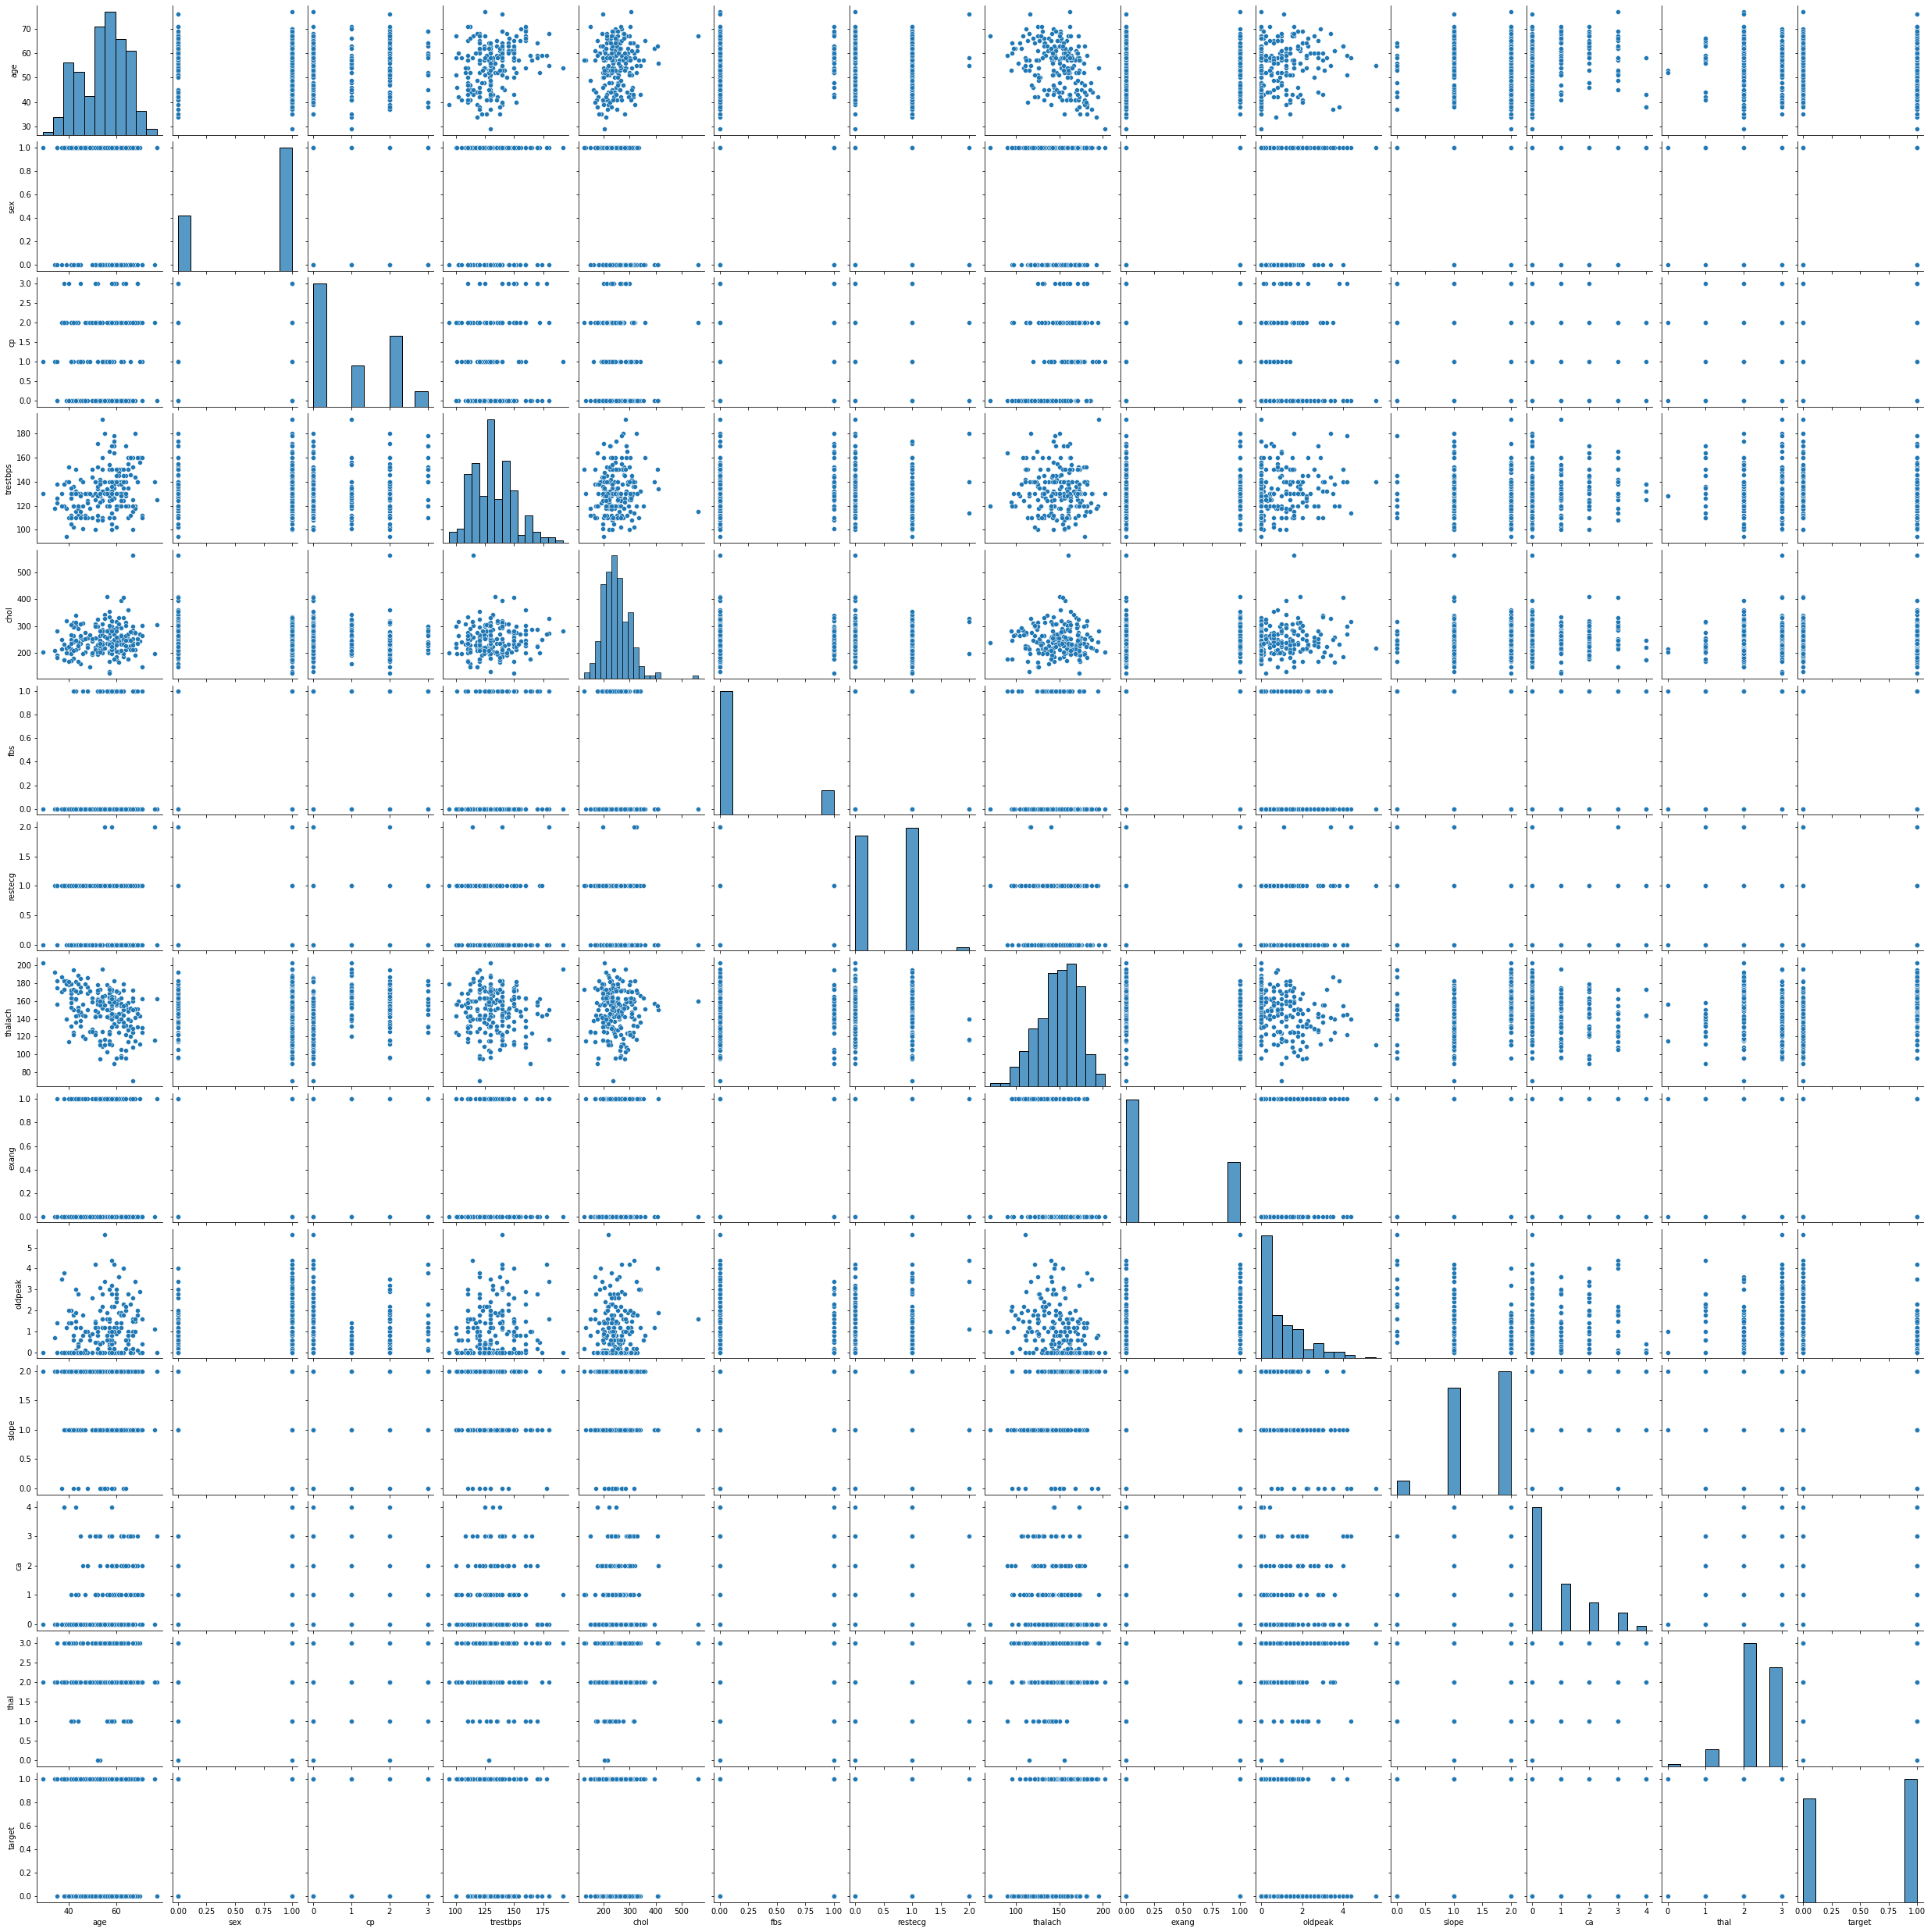

In [ ]:
sns.pairplot(heart_data)

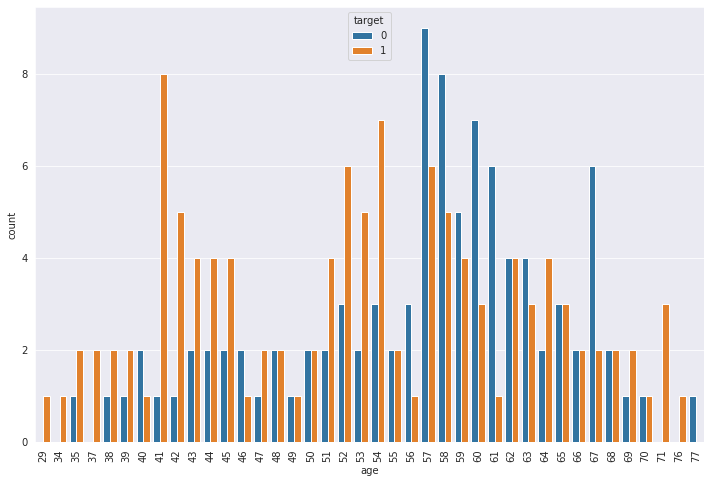

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='age',data=heart_data,hue='target')
plt.xticks(rotation=90)
plt.show()

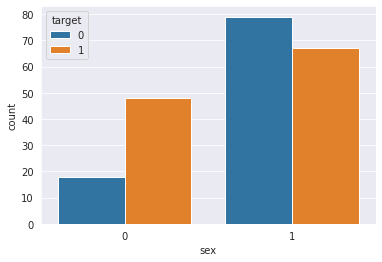

In [ ]:
sns.countplot(x='sex',data=heart_data,hue='target')

## Separate the Input and Target Features of the data

In [4]:
X = heart_data.drop('target',axis=1)
Y = heart_data['target']

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

## Scale your data if required

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [43]:
test_data_scaled = sc.transform(test_data)

# Task 2

## Build a Logistic Regression Model on train set

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

## Evaluate the model using F1 Score

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8235294117647057

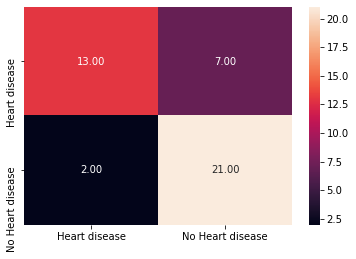

In [17]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Heart disease','No Heart disease'],yticklabels=['Heart disease','No Heart disease'])

**Predictions**

In [44]:
y_pred = lr.predict(test_data_scaled)

In [47]:
sub = pd.DataFrame(y_pred,columns=['prediction'])

In [49]:
sub.head()

,prediction
0,0
1,0
2,1
3,1
4,1


In [51]:
sub.to_csv("Heart_prediction_lr.csv",index=False)

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [7]:
!pip install shap

     |████████████████████████████████| 327kB 6.5MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463910 sha256=9a84a5aae979d5904d933dfe17a9f680be34060cbfe21ff08cea82f59b31391f
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [8]:
import warnings
warnings.filterwarnings('ignore')

## Write your inferences from the generated plot.

In [9]:
import shap
shap.initjs()

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,y_train)
X_test = pd.DataFrame(X_test_scaled,columns=X_test.columns)
y_pred = rf.predict(X_test)

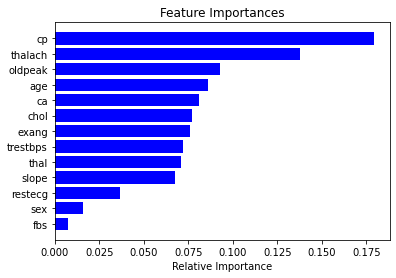

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
f1_score(y_test,y_pred)

0.8235294117647057

**Linear Explainer**

In [36]:
explainer = shap.LinearExplainer(lr, X_train, feature_dependence="independent")
lr_shap_values = explainer.shap_values(X_test)


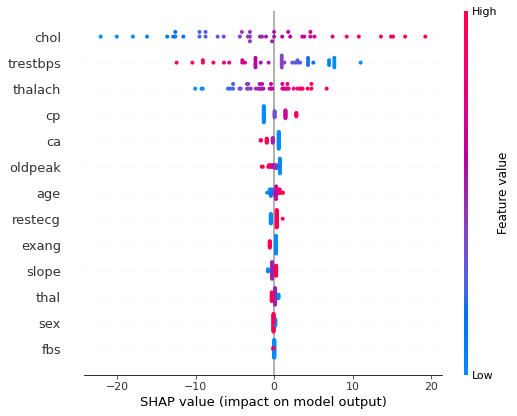

In [37]:
shap.summary_plot(lr_shap_values, X_test, feature_names=X_test.columns)

In [40]:
# plot the SHAP values for the 1th observation 
shap.initjs()
shap.force_plot(
    explainer.expected_value, lr_shap_values[1,:], X_test.iloc[1,:],
    feature_names=X_test.columns
)

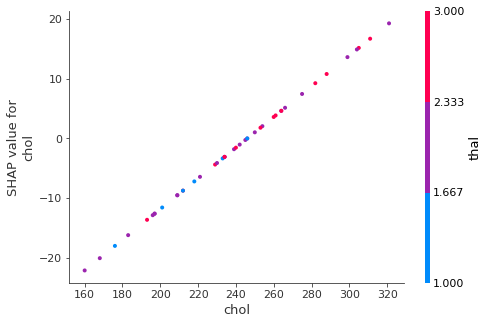

In [41]:
shap.dependence_plot("chol", lr_shap_values, X_test)

**Tree Based Explainer**

In [19]:
explainer = shap.Explainer(rf)

In [20]:
shap_values = explainer.shap_values(X_test)

In [21]:
pd.DataFrame(shap_values[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.003258,0.008367,-0.045294,0.076215,0.009578,0.000435,-0.061862,-0.022770,-0.044091,0.113933,-0.027031,0.071692,0.078577
1,-0.007287,0.011558,-0.126135,0.086998,0.017254,0.001661,-0.056811,-0.010234,-0.053993,-0.014494,-0.024165,0.050004,0.086649
2,-0.001943,0.009906,-0.125845,0.075309,0.010339,0.001953,-0.045620,-0.012728,-0.054466,0.072159,-0.020455,0.048860,0.083536
3,-0.007958,0.010744,-0.141008,0.095530,0.015421,0.002464,-0.052035,0.000805,-0.043003,-0.029694,-0.023162,0.055556,0.087347
4,0.006455,0.010242,-0.058321,0.067354,0.010613,0.000543,-0.049261,-0.051589,0.073083,0.037665,-0.038670,0.081137,0.081757


In [22]:
rf_shap_values = shap.KernelExplainer(rf.predict,X_test)

In [23]:
rf_shap_values.expected_value

0.4418604651162791

In [24]:
shap_values = rf_shap_values.shap_values(X_test)

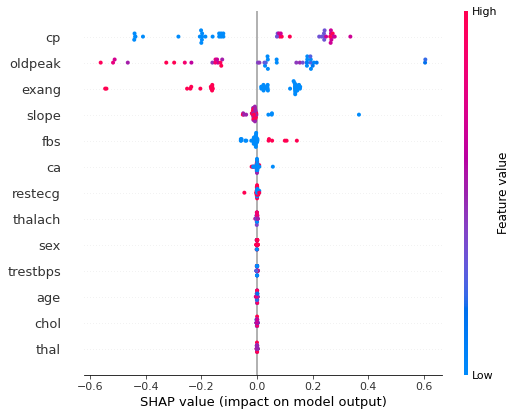

In [25]:
shap.summary_plot(shap_values, X_test)

**The dependence plot**

 It shows the marginal effect that one or two variables have on the predicted outcome. It tells whether the relationship between the target and the variable is linear, monotonic, or more complex

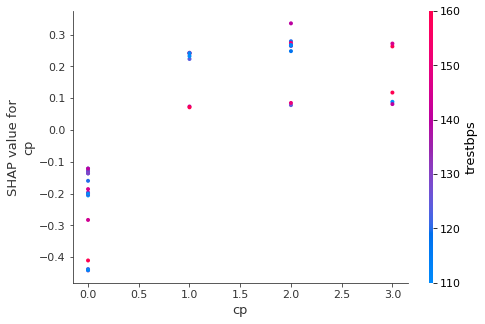

In [26]:
shap.dependence_plot("cp", shap_values, X_test)

# Task 4

## Plot a SHAP force plot for the first row of test data.

**The individual force plot**
It produces a very elegant plot for each observation called the force plot.

In [ ]:
X_test.mean()

age         0.182410
sex         0.086763
cp          0.108093
trestbps   -0.078784
chol       -0.206573
fbs        -0.085040
restecg     0.327761
thalach    -0.151666
exang      -0.135065
oldpeak    -0.087661
slope      -0.410892
ca         -0.150803
thal       -0.310157
dtype: float64

In [ ]:
X_test.iloc[0,:]

age         1.056943
sex         0.685248
cp         -0.906780
trestbps    0.716250
chol       -0.683076
fbs        -0.455129
restecg    -0.961450
thalach    -0.768311
exang      -0.722857
oldpeak     0.817919
slope      -0.846630
ca          1.078955
thal       -2.130178
Name: 0, dtype: float64

In [ ]:
# plot the SHAP values for the 0th observation 
shap.initjs()
shap.force_plot(rf_shap_values.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap_values[0,:]

array([-0.00527611, -0.0195481 , -0.20265658, -0.01156941,  0.02145353,
       -0.00497509, -0.07572473, -0.04884775,  0.01447339, -0.07472297,
       -0.03993265, -0.2143305 ,  0.01049418])

In [ ]:
rf_shap_values.expected_value

0.6511627906976746

In [ ]:
y_test.mean(),y_pred.mean()

(0.5348837209302325, 0.6511627906976745)

In [ ]:
X_test[['cp','thal','chol','exang']].mean()

cp       0.108093
thal    -0.310157
chol    -0.206573
exang   -0.135065
dtype: float64

## Write your inferences from the generated plot.

* The output value is the prediction for that observation (the prediction for this observation is 0.0).

* The base value: The original paper explains that the base value E(y_hat) is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat). You may wonder why it is 0.6512. This is because the mean prediction of Y_test is 0.6512. You can test it out by Y_pred.mean() which produces 0.6512.

* Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

* thal,exang,chol(-0.6831) have a value > average so it  pushes the prediction to the right.

* cp has a value -0.906780  which is lower than the average value 0.108093. So it pushes the prediction to the left.

* The plot is centered on the x-axis at rf_shap_values.expected_value. All SHAP values are relative to the model's expected value like a linear model's effects are relative to the intercept.

# Task 5

**The collective force plot**
Each observation has its own force plot. If all the force plots are combined, rotated 90 degrees and stacked horizontally, we get the force plot of the entire data X_test 

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(rf_shap_values.expected_value, shap_values, X_test)

In [ ]:
X_test.shape

(43, 13)

## Write your inferences from the generated plot.
The above Y-axis is the X-axis of the individual force plot

There are 43 data points in our X_test, so the X-axis has 43 observations.

# Task 6

## Plot a SHAP summary plot using all the features in the data

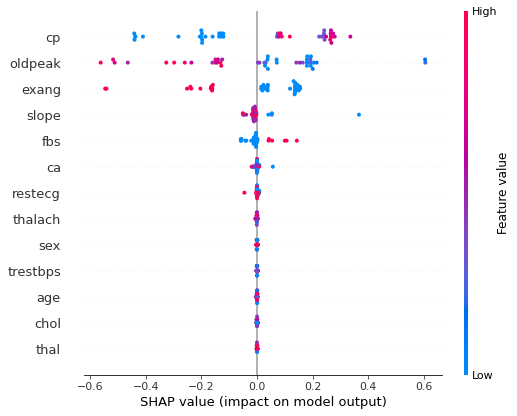

In [28]:
shap.summary_plot(shap_values, X_test)

## Write your inferences from the generated plot.

**The summary plot**

This plot shows the positive and negative relationships of the predictors with the target variable

* Feature importance: Variables are ranked in descending order.
* Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
* Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
* Correlation: A high level of the “slope” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say “thalach” is negatively correlated with the target variable.

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

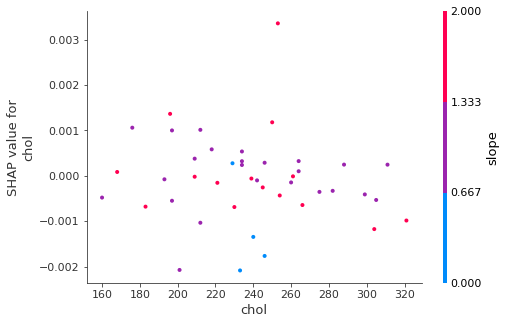

In [27]:
shap.dependence_plot("chol", shap_values, X_test)

## Write your inferences from the generated plot.

**The dependence plot** shows the marginal effect that one or two variables have on the predicted outcome. It tells whether the relationship between the target and the variable is linear, monotonic, or more complex. 

The Python module SHAP includes automatically another variable that “chol” interacts most with. The following plot shows that there is an approximately linear and positive trend between “chol” and the target variable, and “chol” interacts with “slope” frequently.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 